In [127]:
#!/usr/bin/env python3

# Loading data
import os
import time
import netCDF4
import h5py
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman" 
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.style': 'oblique'})

datapath = os.getcwd() + "/Data/data.txt"
# data = h5py.File(datapath, 'r')
data = np.loadtxt(datapath, delimiter = ", ")

timestamp = data[:, 0]
lat = data[:, 1]
lon = data[:, 2]
x = data[:, 3]
y = data[:, 4]
z = data[:, 5]
d = data[:, 6]
sal = data[:, 7]
temp = data[:, 8]
lat_origin = data[:, 9]
lon_origin = data[:, 10]



['15:20',
 '15:37',
 '16:35',
 '16:52',
 '17:09',
 '17:25',
 '17:42',
 '17:59',
 '18:15']

In [128]:
circumference = 40075000 

def deg2rad(deg):
    return deg / 180 * np.pi 

def rad2deg(rad):
    return rad / np.pi * 180

def latlon2xy(lat, lon, lat_origin, lon_origin):
    x = deg2rad(lat - lat_origin) / 2 / np.pi * circumference
    y = deg2rad(lon - lon_origin) / 2 / np.pi * circumference * np.cos(deg2rad(lat))
    return x, y




AttributeError: 'numpy.float64' object has no attribute 'strftime'

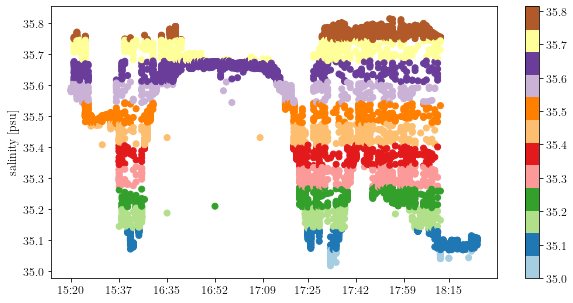

In [140]:
# Visualise the data in 3D environment
import plotly.graph_objects as go
import plotly

ind = np.where(sal >= 35)[0]

fig = go.Figure(data = [go.Scatter3d(
    x = lon[ind].squeeze(), 
    y = lat[ind].squeeze(), 
    z = z[ind].squeeze(), 
    mode = "markers", 
    marker = dict(
        size = 5, 
        color = sal[ind].squeeze(),
        showscale = True, 
        coloraxis = "coloraxis"
    )
)])
fig.update_coloraxes(colorscale = "jet")
fig.show()

# time series data
tid = []
for i in range(len(ind)):
    tid.append(datetime.fromtimestamp(timestamp[i]).strftime("%H:%M"))
plt.scatter(tid, sal[ind], c = sal[ind], vmin = 35, cmap = "Paired")
plt.colorbar()
plt.xticks(tid[0:len(tid):1000])
plt.ylabel("salinity [psu]")
plt.title("Salinity time series data on " + datetime.fromtimestamp(timestamp[i].strftime("%m%d%y")))
plt.show()


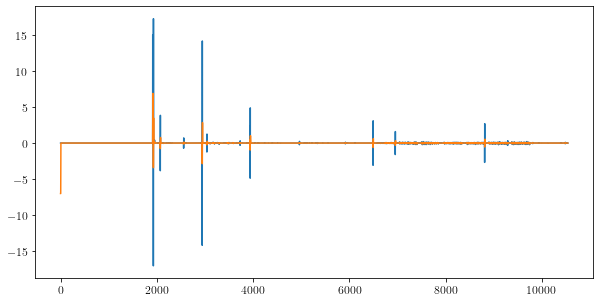

In [113]:
# Variogram for each layer

def RoundBase(number, base = .5):
    # return rounded number
    nearest_multiple = base * np.round(number/base) 
    return nearest_multiple

def allocateLateral(lat, lon, z, sal, depth, tolerance):
    print(depth + tolerance)
    print(depth - tolerance)
    ind_depth = np.where((z <= depth + tolerance) & (z >= depth - tolerance))[0] lat_depth = lat[ind_depth]
    lon_depth = lon[ind_depth]
    sal_depth = sal[ind_depth]
    return lat_depth, lon_depth, sal_depth 

depth_obs = [0, 2.5, 5]

for depth in depth_obs:
    lat_s, lon_s, sal_s = allocateLateral(lat, lon, z, sal, depth, 2)
    